<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/Deep_Learning_Lab_4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement Softmax classifier for CIFAR-10 dataset using 3 layer neural network.**

The **CIFAR dataset**, short for the **Canadian Institute For Advanced Research dataset**, is a collection of widely used computer vision datasets for image classification tasks. The CIFAR datasets are often used as benchmarks for testing the performance of various machine learning algorithms, especially in the field of deep learning.

There are several versions of the CIFAR dataset, but the most well-known ones are CIFAR-10 and CIFAR-100:

**CIFAR-10:**

The CIFAR-10 dataset contains **60,000 32x32** color images in **10 different classes.**
Each class represents a specific category, such as **airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.**
The dataset is split into **50,000 training images and 10,000 test images.**
Each image is associated with a single label indicating its class.

## 1. **Import Libraries:** Start by importing the necessary libraries.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## 2. **Load and Preprocess Data:** Load the CIFAR-10 dataset and preprocess the data.

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 2s 0us/step


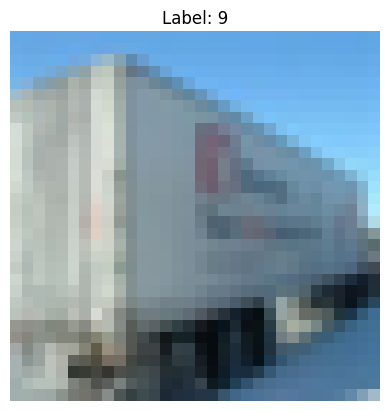

In [11]:
## Visualize the dataset
import matplotlib.pyplot as plt
(X_train, y_train), (_, _) = cifar10.load_data()

# Choose an image index to visualize
image_index = 15

# Display the image
plt.imshow(X_train[image_index])
plt.title(f"Label: {y_train[image_index][0]}")
plt.axis('off')  # Turn off axis labels
plt.show()

## 3. **Build the Neural Network Model:** Create a 3-layer neural network model using Keras.

In [3]:
model = models.Sequential([
    layers.Input(shape=X_train.shape[1:]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

4. **Train the Model:** Train the model using the training data.

In [4]:
epochs = 10
batch_size = 128

model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 6s 14ms/step - loss: 1.9470 - accuracy: 0.2964 - val_loss: 1.8282 - val_accuracy: 0.3557
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 1.7631 - accuracy: 0.3751 - val_loss: 1.7542 - val_accuracy: 0.3805
Epoch 3/10
313/313 [==============================] - 5s 16ms/step - loss: 1.6762 - accuracy: 0.4026 - val_loss: 1.6675 - val_accuracy: 0.4089
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 1.6237 - accuracy: 0.4200 - val_loss: 1.6311 - val_accuracy: 0.4215
Epoch 5/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5826 - accuracy: 0.4396 - val_loss: 1.6271 - val_accuracy: 0.4221
Epoch 6/10
313/313 [==============================] - 5s 16ms/step - loss: 1.5465 - accuracy: 0.4504 - val_loss: 1.6228 - val_accuracy: 0.4264
Epoch 7/10
313/313 [==============================] - 4s 14ms/step - loss: 1.5250 - accuracy: 0.4573 - val_loss: 1.5750 - val_accuracy: 0.4411

5. **Evaluate the Model:** Evaluate the trained model on the test data.

In [6]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.4863 - accuracy: 0.4732
Test Accuracy: 0.4731999933719635
